
Graph Theory Analysis for extracting signals from a brain parcellation 
============================================
### Group 1 (HC | SCI) --- Allegiance Matrix

In [1]:
import os
import numpy as np
import pandas as pd
import random
from datetime import datetime
from nilearn import datasets

# Using the NiftiLabelsMasker
from nilearn.input_data import NiftiLabelsMasker
from nilearn.connectome import ConnectivityMeasure
from brainconn import degree, centrality, clustering, core, distance, modularity, utils
from nilearn import plotting 
from matplotlib.colors import ListedColormap
# !pip install git+https://github.com/FIU-Neuro/brainconn#egg=brainconn

#%% shaded ERROR BAR
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import statsmodels.stats.multitest as smm
import seaborn as sns
import string  

import scipy.io as sio 
from scipy.io import savemat
# pip install teneto
# https://teneto.readthedocs.io/en/latest/tutorial.html
# https://teneto.readthedocs.io/en/latest/tutorial/networkmeasures.html
from teneto import communitymeasures
from nilearn import datasets

from matplotlib.patches import Rectangle
import mne
import mne.viz
# from mne.viz import plot_connectivity_circle
# import plot_connectivity_circle
from mne_connectivity.viz import plot_connectivity_circle
 
# import nibabel as nib
# from surfer import Brain
# from mayavi import mlab
# from netneurotools import stats as nnstats
# from netneurotools import datasets

/Users/ismaila/anaconda3/envs/analysis/lib/python3.11/site-packages/nilearn/input_data/__init__.py:23: FutureWarning: The import path 'nilearn.input_data' is deprecated in version 0.9. Importing from 'nilearn.input_data' will be possible at least until release 0.13.0. Please import from 'nilearn.maskers' instead.
  warnings.warn(message, FutureWarning)


Atlas ROIs are located in nifti image (4D) at: /Users/ismaila/nilearn_data/schaefer_2018/Schaefer2018_200Parcels_7Networks_order_FSLMNI152_1mm.nii.gz


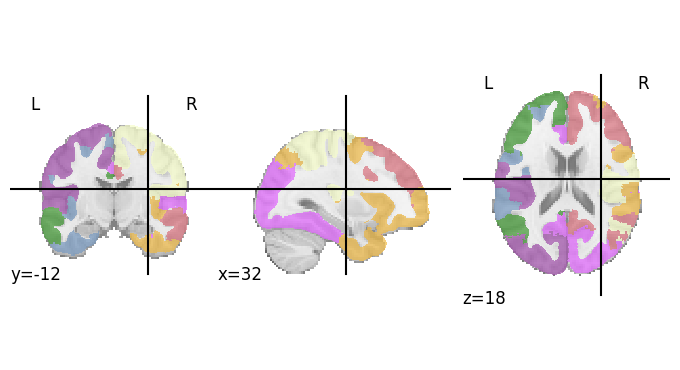

In [2]:
start_time = datetime.now()

# Automatic atlas fetching
#atlas = datasets.fetch_atlas_harvard_oxford('cort-maxprob-thr25-2mm')

save_fig_to = '/Users/ismaila/Documents/C-Codes/SCI_GraphTheory'

atlas = datasets.fetch_atlas_schaefer_2018(n_rois=200, yeo_networks=7, resolution_mm=1)
atlas.region_coords = [(-24,-53,-9), (-26,-77,-14),(-45,-69,-8), (-10,-67,-4), (-27,-95,-12), (-14,-44,-3), (-5,-93,-4), (-47,-70,10), (-23,-97,6), (-11,-70,7), (-40,-85,11), (-12,-73,22), (-7,-87,28), (-23,-87,23), (-51,-4,-2), (-53,-24,9), (-37,-21,16), (-55,-4,10), (-53,-22,18), (-56,-8,31), (-47,-9,46), (-7,-12,46), (-49,-28,57), (-40,-25,57), (-31,-46,63), (-32,-22,64), (-26,-38,68),(-20,-11,68), (-5,-29,67), (-19,-31,68), (-43,-48,-19), (-57,-60,-1), (-26,-70,38), (-54,-27,42), (-41,-35,47), (-33,-49,47),  (-17,-73,54),(-29,-60,59), (-6,-60,57), (-17,-53,68), (-31,-4,53), (-22,6,62), (-48,6,29), (-56,-40,20), (-61,-26,28), (-60,-39,36), (-39,-4,-4), (-33,20,5), (-39,1,11), (-51,9,11), (-28,43,31), (-6,9,41), (-11,-35,46), (-6,-3,65), (-24,22,-20), (-10,35,-21), (-29,-6,-39), (-45,-20,-30), (-28,10,-34), (-43,8,-19), (-53,-51,46), (-35,-62,48), (-45,-42,46), (-61,-43,-13), (-32,42,-13), (-42,49,-6), (-28,58,8), (-42,40,16), (-44,20,27), (-43,6,43), (-9,-73,38), (-5,-29,28), (-3,4,30), (-47,8,-33), (-60,-19,-22), (-56,-6,-12), (-58,-30,-4), (-58,-43,7), (-48,-57,18), (-39,-80,31), (-57,-54,28), (-46,-66,38), (-35,20,-13), (-6,36,-10), (-46,31,-7), (-12,63,-6), (-52,22,8), (-6,44,7), (-8,59,21), (-6,30,25), (-11,47,45), (-3,33,43), (-40,19,49), (-24,25,49), (-9,17,63), (-11,-56,13), (-5,-55,27), (-4,-31,36), (-6,-54,42), (-26,-32,-18), (39,-35,-23), (28,-36,-14), (29,-69,-12), (12,-65,-5), (48,-71,-6), (11,-92,-5), (16,-46,-1), (31,-94,-4), (9,-75,9), (22,-60,7), (42,-80,10), (20,-90,22), (11,-74,26), (16,-85,39), (33,-75,32), (51,-15,5), (64,-23,8), (38,-13,15), (44,-27,18), (59,0,10), (56,-11,14), (58,-5,31), (10,-15,41), (51,-22,52), (47,-11,48), (7,-11,51), (40,-24,57), (32,-40,64), (33,-21,65), (29,-34,65), (22,-9,67), (10,-39,69), (6,-23,69), (20,-29,70), (50,-53,-15), (52,-60,9), (59,-16,34), (46,-38,49), (41,-31,46), (15,-73,53), (34,-48,51), (26,-61,58), (8,-56,61), (21,-48,70), (34,-4,52), (26,7,58), (52,11,21), (57,-45,9), (60,-39,17), (60,-26,27), (51,4,40), (41,6,-15), (46,-4,-4),  (36,24,5), (43,7,4), (7,9,41), (11,-36,47), (8,3,66), (12,39,-22), (28,22,-19), (15,64,-8), (30,9,-38), (47,-12,-35), (25,-11,-32), (62,-37,37), (53,-42,48), (37,-63,47), (63,-41,-12), (34,21,-8), (36,46,-13), (29,58,5), (43,45,10), (46,24,26), (30,48,27), (41,33,37), (42,14,49), (14,-70,37), (5,-24,31), (5,3,30), (7,31,28), (7,25,55), (47,-69,27), (54,-50,28), (51,-59,44), (47,13,-30), (61,-13,-21), (55,-6,-10), (63,-27,-6), (52,-31,2), (51,28,0), (5,37,-14), (8,42,4), (6,29,15), (8,58,18), (15,46,44), (29,30,42), (23,24,53), (12,-55,15), (7,-49,31), (6,-58,44)]

# Loading atlas image stored in 'maps'
atlas_filename = atlas.maps
# Loading atlas data stored in 'labels'
labels = atlas.labels
labels = atlas.labels.astype('U') # covert array of bytes to array of strings

# Setting systems' labels
roi = 200
atlas.systems = [None] * roi
atlas.systems[7] = "Visual (LH)"
atlas.systems[22] = "Somatomotor (LH)"
atlas.systems[37] = "Dorsal Attention (LH)"
atlas.systems[49] = "Ventral Attention (LH)"
atlas.systems[57] = "Limbic (LH)"
atlas.systems[67] = "Frontoparietal (LH)"
atlas.systems[87] = "Default (LH)"
atlas.systems[108] = "Visual (RH)"
atlas.systems[125] = "Somatomotor (RH)"
atlas.systems[141] = "Dorsal Attention (RH)"
atlas.systems[153] = "Ventral Attention (RH)"
atlas.systems[161] = "Limbic (RH)"
atlas.systems[173] = "Frontoparietal (RH)"
atlas.systems[191] = "Default (RH)"
systems = atlas.systems

# Define your own list of colors
my_colors = ['#A251AC', '#789AC1', '#409832', '#E165FE', '#F6FDC9', '#EFB944', '#D9717D']

# Create a custom colormap
cmap = ListedColormap(my_colors)

# Plot the ROI and save as PDF
fig = plotting.plot_roi(atlas_filename, cmap=cmap)
fig.savefig(save_fig_to + '/fig/yeo7.pdf', dpi = 300)

print('Atlas ROIs are located in nifti image (4D) at: %s' %atlas_filename)  # 4D data

In [3]:
#%% Load the functional datasets (hc and sci, or sci_c and sci_t) and 
# extract signals (timeseries) on a parcellation defined by labels
# then calculating the correlation and binarized matrices
# ----------------------------------------------------

# masker = NiftiLabelsMasker(labels_img=atlas_filename, standardize=True,
#                            memory='nilearn_cache', verbose=5)

masker = NiftiLabelsMasker(
    labels_img=atlas_filename,
    standardize="zscore_sample",
    standardize_confounds="zscore_sample",
    memory="nilearn_cache",
    verbose=5,
)

data_path = '/Users/ismaila/Documents/C-Codes/SCI_GraphTheory/sci_data/02_postNR'

analysis = 'ALL' # 'ALL' subjects or 'SCI' ONLY

if analysis == "ALL":
    group = ['hc', 'sci']; group_label = ['Healthy Control', 'Spinal Cord Injury']
elif analysis == "SCI":
    group = ['sci_c', 'sci_t']; group_label = ['Cervical SCI', 'Thoracic SCI']

corr_measure = ConnectivityMeasure(kind='correlation') # kind{“correlation”, “partial correlation”, “tangent”, “covariance”, “precision”}, optional


### Load data from Group 1

In [4]:
#=============================================================================
ts_g1, ts_g2 = [], []

nii_g1 = sorted(os.listdir(data_path+'/'+ group[0]))
nii_g1 = [x for x in nii_g1 if x.startswith('errts')] # remove not-nifti elements
nii_g2 = sorted(os.listdir(data_path+'/'+ group[1]))
nii_g2 = [x for x in nii_g2 if x.startswith('errts')] # remove not-nifti elements

# reading the nifti files
for nii in nii_g1: # healthy controls
    ts_g1.append(masker.fit_transform(data_path + '/'+ group[0] + '/'+ nii)) # ts_g = masker.fit_transform(fmri_filenames, confounds=data.confounds)
    print('Loading from G1 dataset: '+'{}\n'.format(nii))
for nii in nii_g2: # patients
    ts_g2.append(masker.fit_transform(data_path + '/'+ group[1] + '/'+ nii)) # ts_g2 = masker.fit_transform(fmri_filenames, confounds=data.confounds)
    print('Loading from G2 dataset:'+'{}\n'.format(nii))
# saving numpy arrays (timeseries)
# np.save('/Users/ismaila/Documents/C-Codes/SCI_GraphTheory/sci_data/SCI/ts_' + group[0], ts_g1) 
# np.save('/Users/ismaila/Documents/C-Codes/SCI_GraphTheory/sci_data/SCI/ts_' + group[1], ts_g2)   

[NiftiLabelsMasker.wrapped] loading data from /Users/ismaila/nilearn_data/schaefer_2018/Schaefer2018_200Parcels_7Networks_order_FSLMNI152_1mm.nii.gz
Resampling labels
[Memory]0.2s, 0.0min    : Loading _filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min
Loading from G1 dataset: errts.14275.r01.fanaticor+tlrc.nii

[NiftiLabelsMasker.wrapped] loading data from /Users/ismaila/nilearn_data/schaefer_2018/Schaefer2018_200Parcels_7Networks_order_FSLMNI152_1mm.nii.gz
[Memory]0.3s, 0.0min    : Loading _filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min
Loading from G1 dataset: errts.14275.r02.fanaticor+tlrc.nii

[NiftiLabelsMasker.wrapped] loading data from /Users/ismaila/nilearn_data/schaefer_2018/Schaefer2018_200Parcels_7Networks_order_FSLMNI152_1mm.nii.gz
[Memory]0.4s, 0.0min    : Loading _filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min

[Memory]1.6s, 0.0min    : Loading _filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min
Loading from G1 dataset: errts.nc20110804kk.r01.fanaticor+tlrc.nii

[NiftiLabelsMasker.wrapped] loading data from /Users/ismaila/nilearn_data/schaefer_2018/Schaefer2018_200Parcels_7Networks_order_FSLMNI152_1mm.nii.gz
[Memory]1.6s, 0.0min    : Loading _filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min
Loading from G1 dataset: errts.nc20110830si.r01.fanaticor+tlrc.nii

[NiftiLabelsMasker.wrapped] loading data from /Users/ismaila/nilearn_data/schaefer_2018/Schaefer2018_200Parcels_7Networks_order_FSLMNI152_1mm.nii.gz
[Memory]1.7s, 0.0min    : Loading _filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min
Loading from G1 dataset: errts.nc20120830jm.r01.fanaticor+tlrc.nii

[NiftiLabelsMasker.wrapped] loading data from /Users/ismaila/nilearn_data/schaefer_2

[Memory]2.9s, 0.0min    : Loading _filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min
Loading from G1 dataset: errts.nckirby502.r01.fanaticor+tlrc.nii

[NiftiLabelsMasker.wrapped] loading data from /Users/ismaila/nilearn_data/schaefer_2018/Schaefer2018_200Parcels_7Networks_order_FSLMNI152_1mm.nii.gz
[Memory]2.9s, 0.0min    : Loading _filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min
Loading from G1 dataset: errts.nckirby502.r02.fanaticor+tlrc.nii

[NiftiLabelsMasker.wrapped] loading data from /Users/ismaila/nilearn_data/schaefer_2018/Schaefer2018_200Parcels_7Networks_order_FSLMNI152_1mm.nii.gz
[Memory]3.0s, 0.0min    : Loading _filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min
Loading from G1 dataset: errts.nckirby505.r01.fanaticor+tlrc.nii

[NiftiLabelsMasker.wrapped] loading data from /Users/ismaila/nilearn_data/schaefer_2018/Sc

[Memory]4.3s, 0.1min    : Loading _filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min
Loading from G1 dataset: errts.nckirby934.r01.fanaticor+tlrc.nii

[NiftiLabelsMasker.wrapped] loading data from /Users/ismaila/nilearn_data/schaefer_2018/Schaefer2018_200Parcels_7Networks_order_FSLMNI152_1mm.nii.gz
[Memory]4.3s, 0.1min    : Loading _filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min
Loading from G1 dataset: errts.nckirby934.r02.fanaticor+tlrc.nii

[NiftiLabelsMasker.wrapped] loading data from /Users/ismaila/nilearn_data/schaefer_2018/Schaefer2018_200Parcels_7Networks_order_FSLMNI152_1mm.nii.gz
[Memory]4.4s, 0.1min    : Loading _filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min
Loading from G1 dataset: errts.nckirby959.r01.fanaticor+tlrc.nii

[NiftiLabelsMasker.wrapped] loading data from /Users/ismaila/nilearn_data/schaefer_2018/Sc

[Memory]5.7s, 0.1min    : Loading _filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min
Loading from G2 dataset:errts.56297.r02.fanaticor+tlrc.nii

[NiftiLabelsMasker.wrapped] loading data from /Users/ismaila/nilearn_data/schaefer_2018/Schaefer2018_200Parcels_7Networks_order_FSLMNI152_1mm.nii.gz
[Memory]5.7s, 0.1min    : Loading _filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min
Loading from G2 dataset:errts.60970.r01.fanaticor+tlrc.nii

[NiftiLabelsMasker.wrapped] loading data from /Users/ismaila/nilearn_data/schaefer_2018/Schaefer2018_200Parcels_7Networks_order_FSLMNI152_1mm.nii.gz
[Memory]5.8s, 0.1min    : Loading _filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min
Loading from G2 dataset:errts.60970.r02.fanaticor+tlrc.nii

[NiftiLabelsMasker.wrapped] loading data from /Users/ismaila/nilearn_data/schaefer_2018/Schaefer2018_200Parc

[Memory]7.0s, 0.1min    : Loading _filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min
Loading from G2 dataset:errts.sci20121127js.r02.fanaticor+tlrc.nii

[NiftiLabelsMasker.wrapped] loading data from /Users/ismaila/nilearn_data/schaefer_2018/Schaefer2018_200Parcels_7Networks_order_FSLMNI152_1mm.nii.gz
[Memory]7.0s, 0.1min    : Loading _filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min
Loading from G2 dataset:errts.sci20130708jh.r01.fanaticor+tlrc.nii

[NiftiLabelsMasker.wrapped] loading data from /Users/ismaila/nilearn_data/schaefer_2018/Schaefer2018_200Parcels_7Networks_order_FSLMNI152_1mm.nii.gz
[Memory]7.1s, 0.1min    : Loading _filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min
Loading from G2 dataset:errts.sci20130708jh.r02.fanaticor+tlrc.nii

[NiftiLabelsMasker.wrapped] loading data from /Users/ismaila/nilearn_data/schaefer_2

/Users/ismaila/anaconda3/envs/analysis/lib/python3.11/site-packages/nilearn/connectome/connectivity_matrices.py:509: FutureWarning: The default strategy for standardize is currently 'zscore' which incorrectly uses population std to calculate sample zscores. The new strategy 'zscore_sample' corrects this behavior by using the sample std. In release 0.13, the default strategy will be replaced by the new strategy and the 'zscore' option will be removed. Please use 'zscore_sample' instead.
  covariances_std = [
/Users/ismaila/anaconda3/envs/analysis/lib/python3.11/site-packages/nilearn/connectome/connectivity_matrices.py:509: FutureWarning: The default strategy for standardize is currently 'zscore' which incorrectly uses population std to calculate sample zscores. The new strategy 'zscore_sample' corrects this behavior by using the sample std. In release 0.13, the default strategy will be replaced by the new strategy and the 'zscore' option will be removed. Please use 'zscore_sample' inste

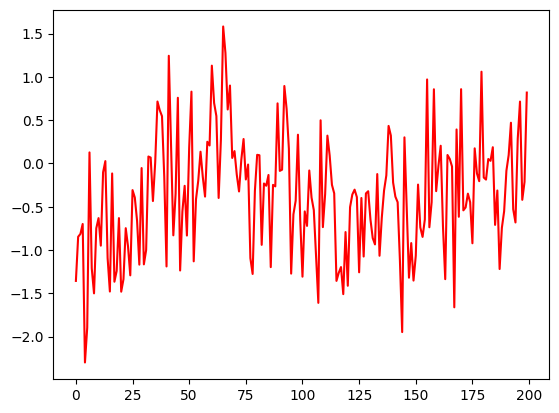

In [5]:
# loading numpy arrays (timeseries)
ts_g1 = list(np.load('/Users/ismaila/Documents/C-Codes/SCI_GraphTheory/sci_data/SCI/ts_' + group[0] + '.npy', allow_pickle=True))
ts_g2 = list(np.load('/Users/ismaila/Documents/C-Codes/SCI_GraphTheory/sci_data/SCI/ts_' + group[1] + '.npy', allow_pickle=True))

# calculating correlations
corr_g1 = corr_measure.fit_transform(ts_g1)
corr_g2 = corr_measure.fit_transform(ts_g2)
# Save arrays into a MATLAB-style .mat file for modularity


corr_path = '/Users/ismaila/Documents/C-Codes/SCI_GraphTheory/sci_data/SCI/fc/'

# corr_hc.mat corr_sci.mat
# savemat(corr_path + 'corr_'+group[0]+'.mat', {'corr_'+group[0]: corr_g1})
# savemat(corr_path + 'corr_'+group[1]+'.mat', {'corr_'+group[1]: corr_g2})

# plot a subject's timeseries
plt.plot(np.arange(0, 200), ts_g1[0][4,:].transpose(), color='red')
plt.show()

#%% Display the mean correlation and binarized matrices

thld = 0.3

# calculate the mean correlation and binary matrices
corr_g1_mean = np.mean(corr_g1, axis=0)
corr_g2_mean = np.mean(corr_g2, axis=0)
bin_g1_mean = utils.binarize(utils.threshold_proportional(corr_g1_mean, thld, copy=True))
bin_g2_mean = utils.binarize(utils.threshold_proportional(corr_g2_mean, thld, copy=True))

# general plot settings
split = np.array([-0.5, 13.5, 29.5, 42.5, 53.5, 59.5, 72.5, 99.5, 114.5, 133.5, 146.5, 157.5, 163.5, 180.5, 199.5])
color = ['#A251AC', '#789AC1', '#409832', '#E165FE', '#F6FDC9', '#EFB944', '#D9717D',
         '#A251AC', '#789AC1', '#409832', '#E165FE', '#F6FDC9', '#EFB944', '#D9717D']

In [6]:
print(f'{analysis} has {len(ts_g1)} {group[0]} & {len(ts_g2)} {group[1]}')

ALL has 76 hc & 61 sci


### G1/G2 Modularity 

In [41]:
#%% MODULARITY

n_set = 2

# import community assignment of all groups
S_g1 = sio.loadmat('/Users/ismaila/Documents/C-Codes/SCI_GraphTheory/sci_data/SCI/modularity_var/S_hc_1.2,-1.0.mat', squeeze_me=True)['S_g1']; #S_hc
S_g2 = sio.loadmat('/Users/ismaila/Documents/C-Codes/SCI_GraphTheory/sci_data/SCI/modularity_var/S_sci_1.2,-1.0.mat', squeeze_me=True)['S_g2']; #S_sci

communities = [S_g1, S_g2]


atlas = datasets.fetch_atlas_schaefer_2018(n_rois=200, yeo_networks=7, resolution_mm=1)
labels = atlas.labels.astype('U') # covert array of bytes to array of strings

# create static communities (networks' labels)
networks = ['Vis', 'SomMot', 'DorsAttn', 'SalVentAttn', 'Limbic', 'Cont', 'Default']
static_communities = np.zeros((200,))
# find networks in atlas.labels and assign a label[1-7] to each
for i, network in enumerate(networks):   
    idx = np.array([network in s for s in labels], dtype=bool)
    static_communities[idx] = i+1 # 1-7

allegiance, flexibility, integration, recruitment, promiscuity = [], [], [], [], []
allegiance_coarse = []

# Find index where elements change value in static_communities array
pivot = np.where(static_communities[:-1] != static_communities[1:])[0]
pivot = np.concatenate([pivot,[199]]) # Any override variable  ?

def create_coarse_allegiance(allegiance):
    allegiance_coarse_lr = np.zeros((14,14))
    p1, q1 = 0, 0
    for i, p2 in enumerate(pivot):
        for j, q2 in enumerate(pivot):
            allegiance_coarse_lr[i,j] = np.nanmean(allegiance[p1:p2+1, q1:q2+1])
            q1 = q2+1
        p1 = p2+1
        q1 = 0    
    # If you have an array of shape (K * M, K * N), you can transform it into something of shape (K * K, M, N) using reshape and transpose
    allegiance_coarse = np.mean(allegiance_coarse_lr.reshape(2, 7, 2, 7).transpose(0, 2, 1, 3).reshape(-1, 7, 7), axis=0)   
    return allegiance_coarse

for s in range(n_set):
    
    allegiance.append(communitymeasures.allegiance(communities[s]))  
    flexibility.append(communitymeasures.flexibility(communities[s]))
    integration.append(communitymeasures.integration(communities[s], static_communities))
    recruitment.append(communitymeasures.recruitment(communities[s], static_communities))
    promiscuity.append(communitymeasures.promiscuity(communities[s])) # 0 entails only 1 community. 1 entails all communities
    allegiance_coarse.append(create_coarse_allegiance(allegiance[s]))

### Modularity Robustness

In [61]:
#%% define global measures Group 1
n_g1 = np.shape(corr_g1)[0] # number of Group 1 subjects

lam_g1 = np.zeros((n_g1,10)) # lambda (characteristic path length)
glb_g1 = np.zeros((n_g1,10)) # global efficieny
clc_g1 = np.zeros((n_g1,10)) # global clustering coefficients
tra_g1 = np.zeros((n_g1,10)) # Transitivity
ass_g1 = np.zeros((n_g1,10)) # assortativity
mod_g1 = np.zeros((n_g1,10)) # modularity

for i in range(10):
    thld = np.float32((i+1)*0.05)    
    # matrix binarization
    bin_g1 = np.zeros(np.shape(corr_g1))
    for k in range(n_g1):
        bin_g1[k] = utils.binarize(utils.threshold_proportional(corr_g1[k], thld, copy=True))   
    # compute global measures HC
    for k in range(n_g1):                
        dis = distance.distance_bin(bin_g1[k]) # TIME CONSUMING  
        lam_g1[k,i] = distance.charpath(dis, include_diagonal=False, include_infinite=False)[0]
        glb_g1[k,i] = distance.charpath(dis, include_diagonal=False, include_infinite=False)[1]
        clc_g1[k,i] = np.mean(clustering.clustering_coef_bu(bin_g1[k]))
        tra_g1[k,i] = np.mean(clustering.transitivity_bu(bin_g1[k]))
        ass_g1[k,i] = core.assortativity_bin(bin_g1[k], flag=0) # 0: undirected graph
        mod_g1[k,i] = modularity.modularity_louvain_und(bin_g1[k], gamma=1, hierarchy=False, seed=None)[1]     
    print(f'g1: {thld}')


# define global measures Group 2
n_g2 = np.shape(corr_g2)[0] # number of Group 2 subjects

lam_g2 = np.zeros((n_g2,10)) # lambda (characteristic path length)
glb_g2 = np.zeros((n_g2,10)) # global efficieny
clc_g2 = np.zeros((n_g2,10)) # global clustering coefficients
tra_g2 = np.zeros((n_g2,10)) # Transitivity
ass_g2 = np.zeros((n_g2,10)) # assortativity
mod_g2 = np.zeros((n_g2,10)) # modularity

for i in range(10):
    thld = np.float32((i+1)*0.05)
    # matrix binarization
    bin_g2 = np.zeros(np.shape(corr_g2))
    for k in range(n_g2):
        bin_g2[k] = utils.binarize(utils.threshold_proportional(corr_g2[k], thld, copy=True))
    # compute global measures SCI
    for k in range(n_g2):                
        dis = distance.distance_bin(bin_g2[k]) # TIME CONSUMING  
        lam_g2[k,i] = distance.charpath(dis, include_diagonal=False, include_infinite=False)[0]
        glb_g2[k,i] = distance.charpath(dis, include_diagonal=False, include_infinite=False)[1]
        clc_g2[k,i] = np.mean(clustering.clustering_coef_bu(bin_g2[k]))
        tra_g2[k,i] = np.mean(clustering.transitivity_bu(bin_g2[k]))
        ass_g2[k,i] = core.assortativity_bin(bin_g2[k], flag=0) # 0: undirected graph
        mod_g2[k,i] = modularity.modularity_louvain_und(bin_g2[k], gamma=1, hierarchy=False, seed=None)[1] 
    print(f'g2: {thld}')
    
# print(f'mod_g1: {mod_g1}') # 76, 10

g1: 0.05000000074505806
g1: 0.10000000149011612
g1: 0.15000000596046448
g1: 0.20000000298023224
g1: 0.25
g1: 0.30000001192092896
g1: 0.3499999940395355
g1: 0.4000000059604645
g1: 0.44999998807907104
g1: 0.5
g2: 0.05000000074505806
g2: 0.10000000149011612
g2: 0.15000000596046448
g2: 0.20000000298023224
g2: 0.25
g2: 0.30000001192092896
g2: 0.3499999940395355
g2: 0.4000000059604645
g2: 0.44999998807907104
g2: 0.5


In [62]:
# savetxt('Module_data.csv', mod_g1, delimiter=',')

with open('Module_data2.csv', 'ab') as f:
    np.savetxt(f, mod_g1, delimiter=',')
    np.savetxt(f, mod_g2, delimiter=',')

# Module_comparison = an_array == another_array
# equal_arrays = comparison.all()
 
# print(equal_arrays)

In [58]:
# mod_g2

In [63]:
# # permutation test
# def perm_test(xs, ys, nmc):
#     n, k = len(xs), 0
#     diff = np.abs(np.mean(xs) - np.mean(ys))
#     zs = np.concatenate([xs, ys])
#     for j in range(nmc):
#         np.random.shuffle(zs)
#         k += diff < np.abs(np.mean(zs[:n]) - np.mean(zs[n:]))
#     return k / nmc

# # lam, glb, clc, tra, ass, mod

# for i in range(mod_g1.shape):
#     print('modularity:', perm_test(mod_g1[i], mod_g2[i], 10000))
# #     print('modularity', perm_test(mod_g1[:,i], mod_g2[:,i], 10000))

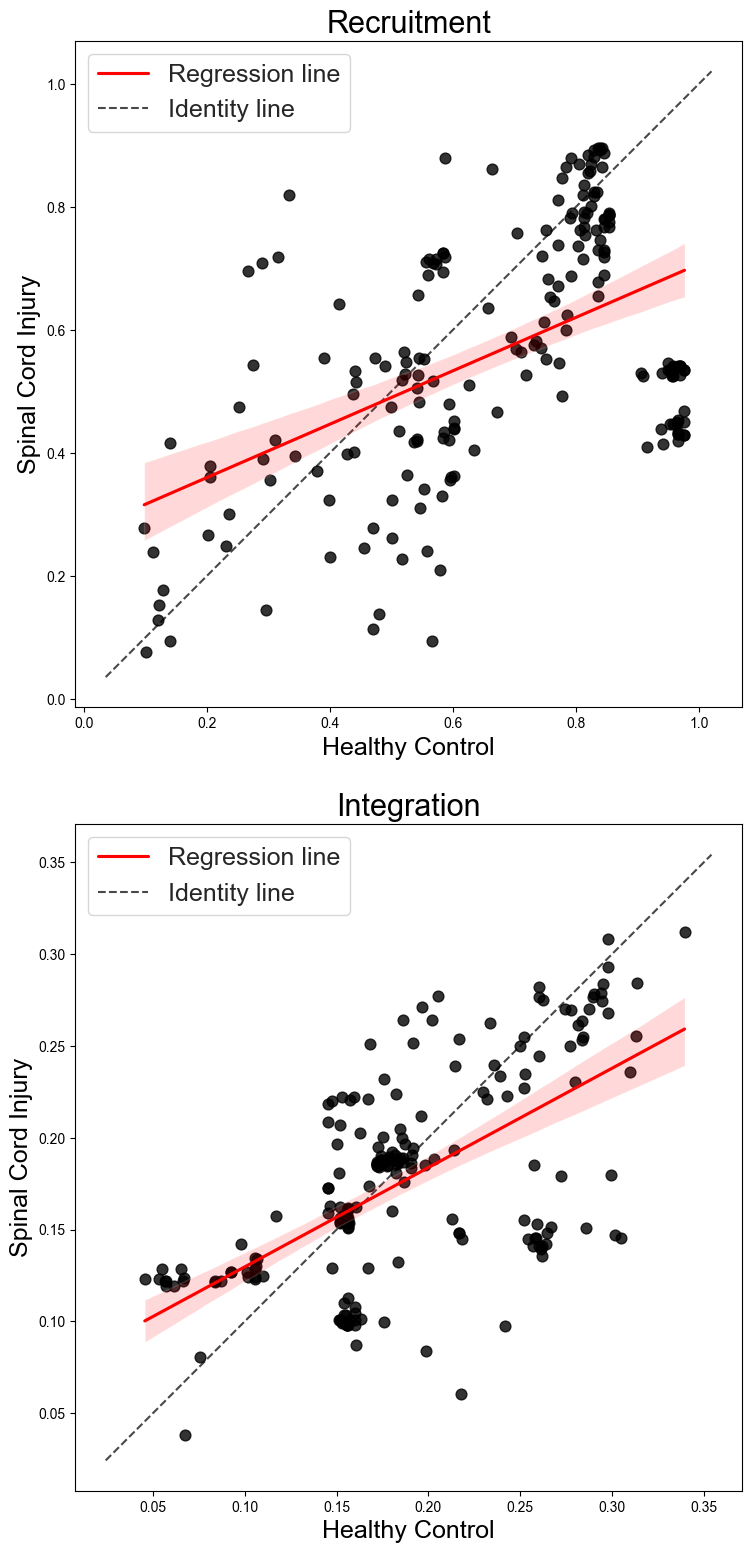

In [12]:

        
#plt.imshow(allegiance_coarse[1])
#plt.colorbar()

# regression between two groups [integration, recruitment]
# define permutation test using monte-carlo method
def perm_test(xs, ys, nmc):
    n, k = len(xs), 0
    diff = np.abs(np.mean(xs) - np.mean(ys))
    zs = np.concatenate([xs, ys])
    for j in range(nmc):
        np.random.shuffle(zs)
        k += diff < np.abs(np.mean(zs[:n]) - np.mean(zs[n:]))
    return k / nmc



#%% plot regressions (scatter)
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(8, 16))
sns.set(style = 'white') # whitegrid
# recruitment
x_rec = recruitment[0]
y_rec = recruitment[1]
sns.regplot(x=x_rec, y=y_rec, ci=95, scatter_kws={"color":"black", "s": 60}, line_kws={"color":"red", 'label':'Regression line'}, ax=ax1)
ax1.set_xlabel(group_label[0], fontsize=18) 
ax1.set_ylabel(group_label[1], fontsize=18)
ax1.set_title('Recruitment', fontsize=22)
lims = [np.min([ax1.get_xlim(), ax1.get_ylim()]),  # min of both axes
        np.max([ax1.get_xlim(), ax1.get_ylim()])]  # max of both axes
ax1.plot(lims, lims, 'k--', alpha=0.8, zorder=0, label='Identity line')
ax1.axis('square') # scaled, equal, square
#ax1.collections[1].set_label('95% CI')
ax1.legend(loc="best", fontsize=18)
perm_test(x_rec, y_rec, 30000)

# integration
x_in = integration[0]
y_in = integration[1]
sns.regplot(x=x_in, y=y_in, ci=95, scatter_kws={"color": "black", "s": 60}, line_kws={"color": "red", 'label':'Regression line'}, ax=ax2)
y_min, y_max = ax2.get_ylim()
x_min, x_max = ax2.get_xlim()
ax2.set_xlabel(group_label[0], fontsize=18) 
ax2.set_ylabel(group_label[1], fontsize=18)
ax2.set_title('Integration', fontsize=22)
lims = [np.min([ax2.get_xlim(), ax2.get_ylim()]),  # min of both axes
        np.max([ax2.get_xlim(), ax2.get_ylim()])]  # max of both axes
ax2.plot(lims, lims, 'k--', alpha=0.8, zorder=0, label='Identity line')
ax2.axis('square') # scaled, equal, square
#ax2.collections[1].set_label('95% CI')
ax2.legend(loc="best", fontsize=18)
perm_test(x_in, y_in, 30000)

plt.tight_layout(pad=2.0) # spacing between subplots
plt.show()

fig.savefig('/Users/ismaila/Documents/C-Codes/SCI_GraphTheory/fig/scatter_int&rec'+analysis+'.pdf',
            bbox_inches='tight', pad_inches=0, format='pdf', dpi=300)

# np.save('/Users/ismaila/Documents/C-Codes/SCI_GraphTheory/sci_data/SCI/recruitment_control.npy', recruitment[0])
# np.save('/Users/ismaila/Documents/C-Codes/SCI_GraphTheory/sci_data/SCI/integration_control.npy', integration[0])



In [13]:
#%% finding significant (diff_integration)
# -----------------------------------------
#%% define permutation test on integration
def perm_test_integration(s1, s2, nmc):
    n, k = np.shape(s1)[1], 0
    int_s1 = communitymeasures.integration(s1, static_communities)
    int_s2 = communitymeasures.integration(s2, static_communities)
    diff = np.abs(int_s2 - int_s1)
    for i in range(nmc): # permute/shuffle community assignment among both groups
        sp = np.random.permutation(np.concatenate((s1, s2), axis=1).T).T
        sp1, sp2 = sp[:,:n], sp[:,n:]
        int_sp1 = communitymeasures.integration(sp1, static_communities)
        int_sp2 = communitymeasures.integration(sp2, static_communities)
        k += diff < np.abs(int_sp2 - int_sp1)
        if i % 10 == 0:
            print('permutation #: ', i) 
    return k / nmc

def perm_test_recruitment(s1, s2, nmc):
    n, k = np.shape(s1)[1], 0
    rec_s1 = communitymeasures.recruitment(s1, static_communities)
    rec_s2 = communitymeasures.recruitment(s2, static_communities)
    diff = np.abs(rec_s2 - rec_s1)
    for i in range(nmc): # permute/shuffle community assignment among both groups
        sp = np.random.permutation(np.concatenate((s1, s2), axis=1).T).T
        sp1, sp2 = sp[:,:n], sp[:,n:]
        rec_sp1 = communitymeasures.recruitment(sp1, static_communities)
        rec_sp2 = communitymeasures.recruitment(sp2, static_communities)
        k += diff < np.abs(rec_sp2 - rec_sp1)
        if i % 10 == 0:
            print('permutation #: ', i) 
    return k / nmc

# run for a given permutation number (nmc)
pvalue_int = perm_test_integration(S_g1, S_g2, nmc=100) ## S_g1 S_g1_sci

pvalue_rec = perm_test_recruitment(S_g1, S_g2, nmc=100) ## ## S_g2 S_g2_sci

#%%

# Automatic atlas fetching
atlas = datasets.fetch_atlas_schaefer_2018(n_rois=200, yeo_networks=7, resolution_mm=1)
atlas.region_coords = [(-24,-53,-9), (-26,-77,-14),(-45,-69,-8), (-10,-67,-4), (-27,-95,-12), (-14,-44,-3), (-5,-93,-4), (-47,-70,10), (-23,-97,6), (-11,-70,7), (-40,-85,11), (-12,-73,22), (-7,-87,28), (-23,-87,23), (-51,-4,-2), (-53,-24,9), (-37,-21,16), (-55,-4,10), (-53,-22,18), (-56,-8,31), (-47,-9,46), (-7,-12,46), (-49,-28,57), (-40,-25,57), (-31,-46,63), (-32,-22,64), (-26,-38,68),(-20,-11,68), (-5,-29,67), (-19,-31,68), (-43,-48,-19), (-57,-60,-1), (-26,-70,38), (-54,-27,42), (-41,-35,47), (-33,-49,47),  (-17,-73,54),(-29,-60,59), (-6,-60,57), (-17,-53,68), (-31,-4,53), (-22,6,62), (-48,6,29), (-56,-40,20), (-61,-26,28), (-60,-39,36), (-39,-4,-4), (-33,20,5), (-39,1,11), (-51,9,11), (-28,43,31), (-6,9,41), (-11,-35,46), (-6,-3,65), (-24,22,-20), (-10,35,-21), (-29,-6,-39), (-45,-20,-30), (-28,10,-34), (-43,8,-19), (-53,-51,46), (-35,-62,48), (-45,-42,46), (-61,-43,-13), (-32,42,-13), (-42,49,-6), (-28,58,8), (-42,40,16), (-44,20,27), (-43,6,43), (-9,-73,38), (-5,-29,28), (-3,4,30), (-47,8,-33), (-60,-19,-22), (-56,-6,-12), (-58,-30,-4), (-58,-43,7), (-48,-57,18), (-39,-80,31), (-57,-54,28), (-46,-66,38), (-35,20,-13), (-6,36,-10), (-46,31,-7), (-12,63,-6), (-52,22,8), (-6,44,7), (-8,59,21), (-6,30,25), (-11,47,45), (-3,33,43), (-40,19,49), (-24,25,49), (-9,17,63), (-11,-56,13), (-5,-55,27), (-4,-31,36), (-6,-54,42), (-26,-32,-18), (39,-35,-23), (28,-36,-14), (29,-69,-12), (12,-65,-5), (48,-71,-6), (11,-92,-5), (16,-46,-1), (31,-94,-4), (9,-75,9), (22,-60,7), (42,-80,10), (20,-90,22), (11,-74,26), (16,-85,39), (33,-75,32), (51,-15,5), (64,-23,8), (38,-13,15), (44,-27,18), (59,0,10), (56,-11,14), (58,-5,31), (10,-15,41), (51,-22,52), (47,-11,48), (7,-11,51), (40,-24,57), (32,-40,64), (33,-21,65), (29,-34,65), (22,-9,67), (10,-39,69), (6,-23,69), (20,-29,70), (50,-53,-15), (52,-60,9), (59,-16,34), (46,-38,49), (41,-31,46), (15,-73,53), (34,-48,51), (26,-61,58), (8,-56,61), (21,-48,70), (34,-4,52), (26,7,58), (52,11,21), (57,-45,9), (60,-39,17), (60,-26,27), (51,4,40), (41,6,-15), (46,-4,-4),  (36,24,5), (43,7,4), (7,9,41), (11,-36,47), (8,3,66), (12,39,-22), (28,22,-19), (15,64,-8), (30,9,-38), (47,-12,-35), (25,-11,-32), (62,-37,37), (53,-42,48), (37,-63,47), (63,-41,-12), (34,21,-8), (36,46,-13), (29,58,5), (43,45,10), (46,24,26), (30,48,27), (41,33,37), (42,14,49), (14,-70,37), (5,-24,31), (5,3,30), (7,31,28), (7,25,55), (47,-69,27), (54,-50,28), (51,-59,44), (47,13,-30), (61,-13,-21), (55,-6,-10), (63,-27,-6), (52,-31,2), (51,28,0), (5,37,-14), (8,42,4), (6,29,15), (8,58,18), (15,46,44), (29,30,42), (23,24,53), (12,-55,15), (7,-49,31), (6,-58,44)]
label = atlas.labels.astype('U') # covert array of bytes to array of strings

color = (['purple']*14) + (['blue']*16) + (['green']*13) + (['violet']*11) + (['moccasin']*6) + (['orange']*13) + (['red']*27) + (['purple']*15) + (['blue']*19) + (['green']*13) + (['violet']*11) + (['moccasin']*6) + (['orange']*17) + (['red']*19)

diff_int = abs(integration[0] - integration[1])
diff_rec = abs(recruitment[0] - recruitment[1])

# Recruitment 
sig_rec = np.where((diff_rec >= 0.2) & (pvalue_rec == 0))[0] # -np.sort(-diff_rec)[10]
coords = list(atlas.region_coords[i] for i in sig_rec)
colors = list(color[i] for i in sig_rec)
labels = list(label[i] for i in sig_rec)
labels = list(str(i+1) for i in sig_rec)
size = list(diff_rec[i] for i in sig_rec)
size = [int(x*100) for x in size]
view = plotting.view_markers( 
    coords, colors, marker_size=np.array(size) ) # marker_labels=labels
view.open_in_browser() 
view.save_as_html('/Users/ismaila/Documents/C-Codes/SCI_GraphTheory/fig/diff_recruitment_'+analysis+'.html') 

# Integration 
sig_int = np.where((diff_int >= 0.1) & (pvalue_int == 0))[0] # -np.sort(-diff_int)[10]
coords = list(atlas.region_coords[i] for i in sig_int)
colors = list(color[i] for i in sig_int)
labels = list(label[i] for i in sig_int)
labels = list(str(i+1) for i in sig_int)
size = list(diff_int[i] for i in sig_int)
size = [int(x*200) for x in size]
view = plotting.view_markers( 
    coords, colors, marker_size=np.array(size) ) # marker_labels=labels
view.open_in_browser() 
view.save_as_html('/Users/ismaila/Documents/C-Codes/SCI_GraphTheory/fig/diff_integration_'+analysis+'.html') 


permutation #:  0
permutation #:  10
permutation #:  20
permutation #:  30
permutation #:  40
permutation #:  50
permutation #:  60
permutation #:  70
permutation #:  80
permutation #:  90
permutation #:  0
permutation #:  10
permutation #:  20
permutation #:  30
permutation #:  40
permutation #:  50
permutation #:  60
permutation #:  70
permutation #:  80
permutation #:  90


0
1
2
3
4
5
6
7
8
9
permutation #:  0
permutation #:  0
permutation #:  10
permutation #:  20
permutation #:  30
permutation #:  40
permutation #:  50
permutation #:  60
permutation #:  70
permutation #:  80
permutation #:  90
permutation #:  100
permutation #:  110
permutation #:  120
permutation #:  130
permutation #:  140
permutation #:  150
permutation #:  160
permutation #:  170
permutation #:  180
permutation #:  190
permutation #:  200
permutation #:  210
permutation #:  220
permutation #:  230
permutation #:  240
permutation #:  250
permutation #:  260
permutation #:  270
permutation #:  280
permutation #:  290
permutation #:  300
permutation #:  310
permutation #:  320
permutation #:  330
permutation #:  340
permutation #:  350
permutation #:  360
permutation #:  370
permutation #:  380
permutation #:  390
permutation #:  400
permutation #:  410
permutation #:  420
permutation #:  430
permutation #:  440
permutation #:  450
permutation #:  460
permutation #:  470
permutation #

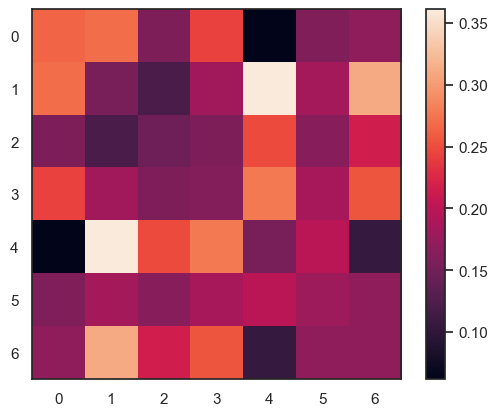

In [14]:
#%% MODULARITY + permutation -> create null distribution

# number of permutations
n_perm = 10

# create list of list for modularity variables (e.g., allegiance ...)
allegiance_perm = flexibility_perm = integration_perm = recruitment_perm = [[] for i in range(n_perm)]

for i in range(n_perm):
    
    # permute/shuffle community assignment among both groups
    S_perm = np.random.permutation(np.concatenate((S_g1, S_g2), axis=1).T).T
    S_perm_g1 = S_perm[:,:np.shape(S_g1)[1]]
    S_perm_g2 = S_perm[:,np.shape(S_g1)[1]:]
    communities_perm = [S_perm_g1, S_perm_g2]
    
    for s in range(n_set):
        
        allegiance_perm[i].append(communitymeasures.allegiance(communities_perm[s]))  
        #flexibility_perm[i].append(communitymeasures.flexibility(communities_perm[s]))
        #integration_perm[i].append(communitymeasures.integration(communities_perm[s], static_communities))
        #recruitment_perm[i].append(communitymeasures.recruitment(communities_perm[s], static_communities))
        
    print(i)

#%% define permutation test on allegiance matrices using monte-carlo method
def perm_test_allegiance(s1, s2, nmc):
    n, k = np.shape(s1)[1], 0
    alg_s1 = communitymeasures.allegiance(s1)
    alg_s2 = communitymeasures.allegiance(s2)
    diff = np.abs(alg_s2 - alg_s1)
    for i in range(nmc): # permute/shuffle community assignment among both groups
        sp = np.random.permutation(np.concatenate((s1, s2), axis=1).T).T # Why do we randomiz this ?
        sp1, sp2 = sp[:,:n], sp[:,n:]
        alg_sp1 = communitymeasures.allegiance(sp1)
        alg_sp2 = communitymeasures.allegiance(sp2)
        k += diff < np.abs(alg_sp2 - alg_sp1)
        if i % 10 == 0:
            print('permutation #: ', i) 
    return k / nmc

def perm_test_allegiance_coarse(s1, s2, nmc):
    n, k = np.shape(s1)[1], 0
    alg_s1 = communitymeasures.allegiance(s1)
    alg_s2 = communitymeasures.allegiance(s2)
    alg_s1_coarse = create_coarse_allegiance(alg_s1)
    alg_s2_coarse = create_coarse_allegiance(alg_s2)
    diff = np.abs(alg_s2_coarse - alg_s1_coarse)
    for i in range(nmc): # permute/shuffle community assignment among both groups
        sp = np.random.permutation(np.concatenate((s1, s2), axis=1).T).T
        sp1, sp2 = sp[:,:n], sp[:,n:]
        alg_sp1 = communitymeasures.allegiance(sp1)
        alg_sp2 = communitymeasures.allegiance(sp2)
        alg_sp1_coarse = create_coarse_allegiance(alg_sp1)
        alg_sp2_coarse = create_coarse_allegiance(alg_sp2)
        k += diff < np.abs(alg_sp2_coarse - alg_sp1_coarse)
        if i % 10 == 0:
            print('permutation #: ', i) 
    return k / nmc

# run for a given permutation number (nmc)
pvalue = perm_test_allegiance(S_g1, S_g2, nmc=10) # another pvalue var exist ?

pvalue_c = perm_test_allegiance_coarse(S_g1, S_g2, nmc=1000)

pvalue_lr = np.zeros((14,14))
pvalue_coarse = np.zeros((7,7))

# Find index where elements change value in static_communities array
pivot = np.where(static_communities[:-1] != static_communities[1:])[0]
pivot = np.concatenate([pivot,[199]])

# create coarse allegiance metrices
p1, q1 = 0, 0
for i, p2 in enumerate(pivot): 
    for j, q2 in enumerate(pivot): 
        pvalue_lr[i,j] = np.nanmean(pvalue[p1:p2+1, q1:q2+1])
        q1 = q2+1
    p1 = p2+1
    q1 = 0

# If you have an array of shape (K * M, K * N), you can transform it into something of shape (K * K, M, N) using reshape and transpose
pvalue_coarse = np.mean(pvalue_lr.reshape(2, 7, 2, 7).transpose(0, 2, 1, 3).reshape(-1, 7, 7), axis=0)    
    
#%%

pvalue_int = perm_test_integration(S_g1, S_g2, nmc=100)

plt.imshow(pvalue_coarse)
plt.colorbar()

#%%


/var/folders/8b/2kw2hzb121d2qrz2jgm3kp6d1c_bh_/T/ipykernel_59096/394242823.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(networks, fontsize=12)
/var/folders/8b/2kw2hzb121d2qrz2jgm3kp6d1c_bh_/T/ipykernel_59096/394242823.py:43: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(networks, fontsize=12)


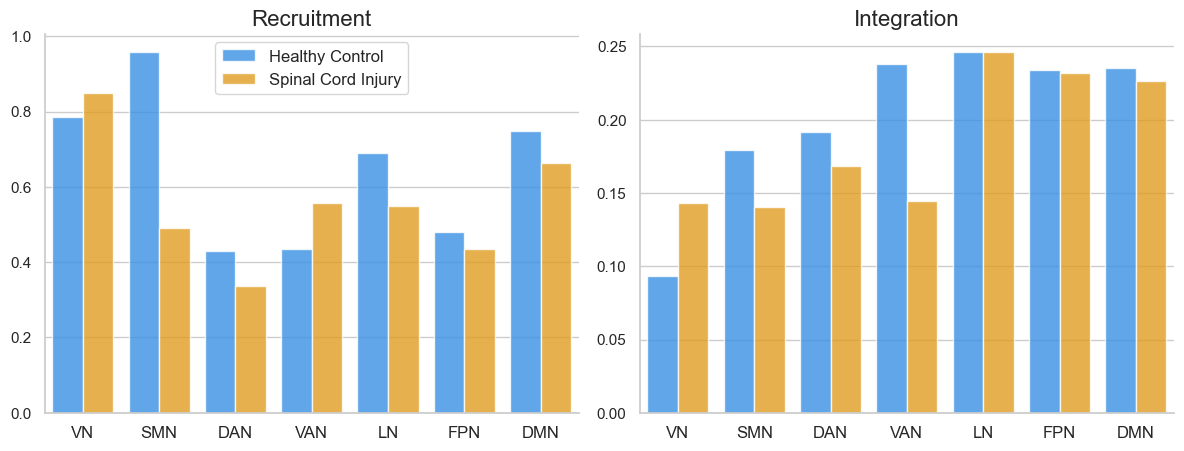

In [17]:
networks = ['VN', 'SMN', 'DAN', 'VAN', 'LN', 'FPN', 'DMN']

# corase recruitment values
rec_mor = np.diag(allegiance_coarse[0]) # morning session
rec_eve = np.diag(allegiance_coarse[1]) # evening session

# corase integration values
int_mor = (allegiance_coarse[0].sum(1)-np.diag(allegiance_coarse[0]))/(allegiance_coarse[0].shape[1]-1) # morning session
int_eve = (allegiance_coarse[1].sum(1)-np.diag(allegiance_coarse[1]))/(allegiance_coarse[1].shape[1]-1) # evening session

num = 2
data = np.concatenate((rec_mor, rec_eve, int_mor, int_eve), axis=0)
df = pd.DataFrame(data=data, columns=["Values"]) # index=rows
metric = np.repeat(['Recruitment', 'Integration'], 14, axis=0)
df['Metric'] = metric
group = np.tile(networks, 2*num)
df['Network'] = group  
session = np.tile(np.repeat([group_label[0], group_label[1]], 7, axis=0), num)
df['Session'] = session 

sns.set(style="whitegrid")
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Recruitment
sns.barplot(x="Network", y="Values", hue="Session", ax=ax1,
                 data=df.loc[df['Metric']=='Recruitment'],
                 palette=['#1E90FF', '#FFA500'], alpha=0.8)

ax1.set_xticklabels(networks, fontsize=12)
ax1.set_xlabel(None)
ax1.set_ylabel(None)
ax1.set_title('Recruitment', fontsize=16) 
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
#ax1.axhline(y=df.loc[df['Metric']=='Recruitment']['Values'].mean(), color='r', linestyle='--', linewidth=1.5, label='Mean')
ax1.legend(fontsize=12, loc='upper center')

# Integration
sns.barplot(x="Network", y="Values", hue="Session", ax=ax2,
                 data=df.loc[df['Metric']=='Integration'],
                 palette=['#1E90FF', '#FFA500'], alpha=0.8)

ax2.set_xticklabels(networks, fontsize=12)
ax2.set_xlabel(None)
ax2.set_ylabel(None)
ax2.set_title('Integration', fontsize=16) 
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
#ax2.axhline(y=df.loc[df['Metric']=='Integration']['Values'].mean(), color='r', linestyle='--', linewidth=1.5, label='Mean')
ax2.legend(fontsize=12, loc='best')
ax2.get_legend().remove()

plt.tight_layout()
plt.subplots_adjust(top=0.85)
 
plt.savefig('/Users/ismaila/Documents/C-Codes/SCI_GraphTheory/fig/catplot_'+analysis+'.pdf', bbox_inches='tight', pad_inches=0, format='pdf', dpi=300) 

In [18]:
end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

Duration: 0:27:29.366750


In [19]:
# import os
# os.environ['SUBJECTS_DIR'] # Sanity check

In [20]:
# import types
# import pip #needed to use the pip functions
# # for i in pip.get_installed_distributions(local_only=True):
# #     print(i)

# def imports():
#     for name, val in globals().items():
#         if isinstance(val, types.ModuleType):
#             yield val.__name__
# list(imports())

In [21]:
import pkg_resources

installed_packages = pkg_resources.working_set
for package in installed_packages:
    print(f"{package.key}=={package.version}")

babel==2.11.0
bottleneck==1.3.5
brotli==1.0.9
jinja2==3.1.2
markupsafe==2.1.1
pillow==10.1.0
pyqt5==5.15.10
pyqt5-sip==12.13.0
pyqtwebengine==5.15.6
pysocks==1.7.1
pyyaml==6.0.1
pygments==2.15.1
qdarkstyle==3.0.2
qtawesome==1.2.2
qtpy==2.4.1
rtree==1.0.1
sqlalchemy==2.0.23
send2trash==1.8.2
sphinx==5.0.2
unidecode==1.2.0
alabaster==0.7.12
anyio==3.5.0
applaunchservices==0.3.0
appnope==0.1.2
apptools==5.2.1
argon2-cffi==21.3.0
argon2-cffi-bindings==21.2.0
arrow==1.2.3
astor==0.8.1
astroid==2.14.2
asttokens==2.0.5
atomicwrites==1.4.0
attrs==23.1.0
autopep8==1.6.0
backcall==0.2.0
bctpy==0.6.1
beautifulsoup4==4.12.2
bids-validator==1.13.1
binaryornot==0.4.4
black==0.0
bleach==4.1.0
brainconn==0.0.1
certifi==2023.11.17
cffi==1.16.0
cftime==1.6.3
chardet==4.0.0
charset-normalizer==2.0.4
citeproc-py==0.6.0
click==8.1.7
cloudpickle==2.2.1
colorama==0.4.6
comm==0.1.2
configobj==5.0.8
contourpy==1.2.0
cookiecutter==1.7.3
cryptography==41.0.3
cycler==0.12.1
cytoolz==0.12.2
debugpy==1.6.7
decorato